In [1]:
import sys
sys.path.append('..')

# Helper imports
import utils

# Numerical computing and display imports
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def display_histogram(img, range=(-1, 1)):
    # tuple to select colors of each channel line
    colors = ("red", "green", "blue")

    # create the histogram plot, with three lines, one for
    # each color
    plt.figure()
    plt.xlim([range[0], range[1]])
    for channel_id, color in enumerate(colors):
        histogram, bin_edges = np.histogram(
            img[:, :, channel_id], bins=256*4, range=range
        )
        plt.plot(bin_edges[0:-1], histogram, color=color)

    plt.title("Gradient Histogram")
    plt.xlabel("Color value")
    plt.ylabel("Pixel count")
    plt.show()

### Analyze grad estiimate with 1 distribution

In [12]:
def nes_gradient_estimate(img, mean=0, std=0.1, sigma=0.5, num_samples=100):
    def hamming_dist_loss(img, perterbed_img):
        # Compute the hamming distance 
        orig_hash = utils.compute_hash(img)
        perterbed_hash = utils.compute_hash(perterbed_img)
        return utils.distance(orig_hash, perterbed_hash, 'hamming')
    grads = []
    num_queries = 0
    print('Estimating gradients with NES...')
    for i in range(num_samples):
        noise = np.random.normal(mean, std, size=img.shape)
        new = img + sigma*noise*255
        g = noise*hamming_dist_loss(img, new)
        grads.append(g)
        num_queries += 2
    est_grad = np.mean(np.array(grads), axis=0)
    return est_grad/(2*np.pi*sigma), num_queries

Estimating gradients with NES...


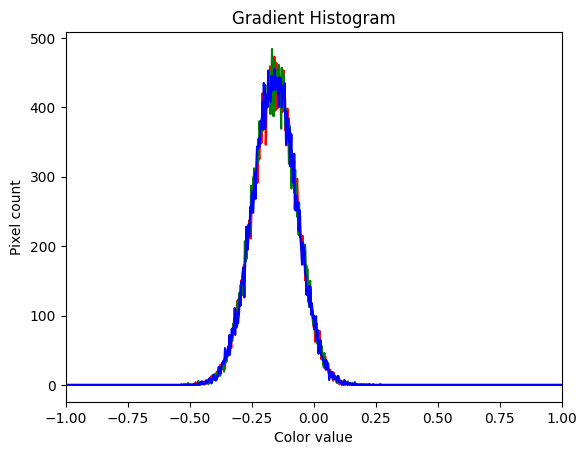

In [13]:
idx = 1
img_path = f'../../images/{idx}.jpeg' 
img = utils.load_img(img_path)
nes_mean = -0.025
nes_std = 0.1
nes_sigma = 0.7
nes_eps = 0.005
nes_num_samples=50

est_grad, num_queries = nes_gradient_estimate(img, mean=nes_mean, std=nes_std, sigma=nes_sigma, num_samples=nes_num_samples)
display_histogram(est_grad)

### Analyze grad estimate with 2 distributions

In [8]:
def nes_gradient_estimate_two(img, mean=0, std=0.1, sigma=0.5, num_samples=100):
    def hamming_dist_loss(img, perterbed_img):
        # Compute the hamming distance 
        orig_hash = utils.compute_hash(img)
        perterbed_hash = utils.compute_hash(perterbed_img)
        return utils.distance(orig_hash, perterbed_hash, 'hamming')
    grads = []
    num_queries = 0
    print('Estimating gradients with NES...')
    for i in range(num_samples):
        if i < num_samples//2:
            noise = np.random.normal(mean+0.1, std, size=img.shape)
        else:
            noise = np.random.normal(mean-0.1, std, size=img.shape)
        new = img + sigma*noise*255
        g = noise*hamming_dist_loss(img, new)
        grads.append(g)
        num_queries += 2
    est_grad = np.mean(np.array(grads), axis=0)
    return est_grad/(2*np.pi*sigma), num_queries

Estimating gradients with NES...


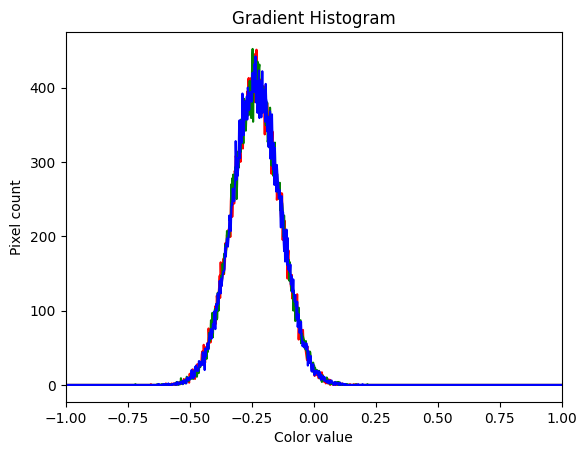

In [9]:
idx = 1
img_path = f'../../images/{idx}.jpeg' 
img = utils.load_img(img_path)
nes_mean = 0
nes_std = 0.1
nes_sigma = 0.7
nes_eps = 0.005
nes_num_samples=50

est_grad_2, num_queries = nes_gradient_estimate_two(img, mean=nes_mean, std=nes_std, sigma=nes_sigma, num_samples=nes_num_samples)
display_histogram(est_grad_2)